# Converting Celsius to Farenheit

Farenheit is related to Celsius in the following way:

$$ F = C \times 1.8 + 32 $$

We can obviously invert this relationship, but we can also learn it using ... spoooookie machine learning!

And we can generate a mapping of farenheit to celsius like so:



## Generate the Data

In [1]:
import numpy as np

C = np.linspace(0, 100, 1000)
F = C * 1.8 + 32

Learning this mapping is trivial because we already know the fully parameterized form. But, we can do it anyway, =).

## Use Linear Regression

Linear regression assumes a funcitonal form:

$$ Y = X \beta + \varepsilon $$

With Y an input matrix of dimension $N \times M$ where $N$ is is the number of observations while $M$ is dimensionality of the output (1).

$ \mathbf{Y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad
$

$ X = \begin{pmatrix} \mathbf{x}^\mathsf{T}_1 \\ \mathbf{x}^\mathsf{T}_2 \\ \vdots \\ \mathbf{x}^\mathsf{T}_n \end{pmatrix}
 = \begin{pmatrix} 1 &  x_{11} & \cdots & x_{1p} \\
 1 & x_{21} & \cdots & x_{2p} \\
 \vdots & \vdots & \ddots & \vdots \\
 1 & x_{n1} & \cdots & x_{np}
 \end{pmatrix}, $

$ \boldsymbol\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.
$


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lin_model = LinearRegression(fit_intercept=True)

In [4]:
lin_model.fit(X=C.reshape(-1, 1), y=F)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print(lin_model.coef_, lin_model.intercept_)

[1.8] 32.00000000000003


Looks good to me - we recovered the parameters nicely.

## With A Neural Network

The simplest neural network is a dense-network.

In [6]:
import tensorflow as tf
import logging

# Remove outputs other than errors.
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### About the Model

#### `input_shape`

`input_shape` describes the shape of one set of input features - in this case, just a vector of one-dimension. 

#### `units`

`units` describes the number of neurons in the layer - the number of neurons defines how many internal variables the layer must learn (weights) to solve the problem. In this case, the layer is also the final output, because we predict a continuous output.

Multilayer networks must match dimensions between neurons - this will become more apparent later on.

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

### Compile the Model

A model is compiled by associating the architecture with a *loss function* and an *optimizer function*

#### Loss Function

The Loss Function defines the method by which we calculate "goodness" of the prediction during training - in this case, we choose `mean_squared_error` because we are doing regression and we want to penalize the predictor by the square of the error to encourage it to predict closer to the true value.

#### Optimizater Funciton

This defines the method by which internal parameters (neuron weights) are adjusted to perform the optimization (reduce the error to zero, if possible). Adam is a pretty popular method, but the O.G. method is gradient descent - which is interesting when it comes to Neural Networks, since back-propagation must be employed (reverse chain-rule) to propagate the loss through each iteration of the gradient descent. Adam is an alternative to stochastic gradient descent.

The Optimizer takes a learning rate, which sets how much to change the weights per gradient step.

In [8]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

### Train the Model

Training the model is done by calling 'fit', and it returns a history object which contains information about the training run, e.g. epochs, loss, accuracy, rms, etc.

In [9]:
history = model.fit(C, F, epochs=500, verbose=False)

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epochs')

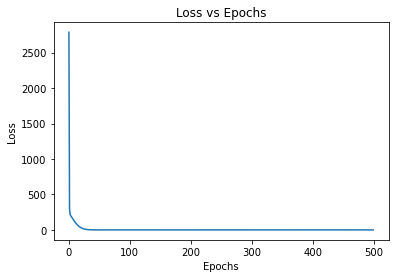

In [11]:
plt.plot(history.history['loss'])
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")

Lets look at the weights:

In [12]:
# returns for layer 0, the weights as the first element, and the biases as the
# second element, so that we have: input * weight + bias (which is literally 
# linear regression)
model.layers[0].get_weights()

[array([[1.7982576]], dtype=float32), array([32.00323], dtype=float32)]

Try some predictions

In [13]:
print(model.predict([100.0]))

[[211.829]]


Review what we did - the network was able to get pretty close - the real answer is $100 \times 1.8 + 32 = 212$. Note too that we explicitly specified the functional form by using a linear regression, which learned these parameters essentially exactly. The neural network learned the correct parameters with its architecture, but we can try a over-specified model just for funzies:

In [14]:
complex_model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=4, input_shape=[1]),
  tf.keras.layers.Dense(units=4),
  tf.keras.layers.Dense(units=1)
])
complex_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
complex_history = complex_model.fit(C, F, epochs=500, verbose=False)

In [15]:
model.predict([100.0])

array([[211.829]], dtype=float32)

In [16]:
complex_model.predict([100.0])

array([[211.99998]], dtype=float32)

Text(0.5, 0, 'Epochs')

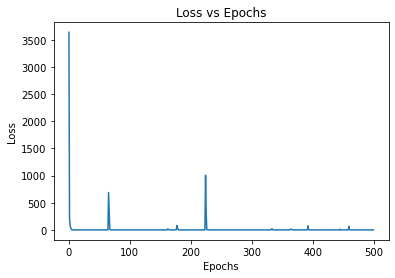

In [17]:
plt.plot(complex_history.history['loss'])
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")

It seems like the model has trouble with the more complex architecture - the loss function can't converge to a global minimum